# 26. Graph Data Structure

### 그래프는 노드(node)와 그 노드를 연결하는 간선(edge)을 하나로 모아 놓은 자료 구조를 말한다.

### 노드 (Node)

정점(vertex)라고도 부르며 위치를 나타낸다.

### Edge (간선)

위치간의 연결선을 나타낸다. 일방향 혹은 양방향일 수 있다. 

###  가중치 (weight)

두 node 사이를 이동하는 비용 (cost) 를 의미한다. 예를 들어 두개의 도시(node) 를 연결하는 길의 가중치는 두 도시 사이의 거리이다.

### 그래프 (Graph)

그래프는 $G=(V,E)$ 로 표시할 수 있고, 각 edge 는 연결되는 node 와 weight 의 tuple 로 표시한다  $(node1, node2, weight)$.

<img src="graph_diagram.png" width="300">


6 개의 node 와 9 개의 edge 로 구성된 위 그래프는 다음과 같이 node 와 edge 의 집합(set) 으로 표시한다.

$$V=\{a,b,c,d,e,f\}$$

$$E=\{(a,b,7),(a,c,9),(a,f,14),(b,d,15),(b,c,10),(c,d,11),(c,f,2),(d,e,6),(e,f,9)\}$$

### 경로 (Path)

경로는 node 를 통과하는 순서이다. 경로의 길이는 node 사이 edge 의 weight 를 모두 합한 것이다.
예를 들어 경로 $(a, c, d, e)$ 의 edge 는 $\{(a, c, 9), (c, d, 11), (d, e, 6)\}$ 이 되고 경로의 길이는 26 이다.


### Python class 를 이용한 Graph 구조 구현

In [1]:
# __iter__ : iterable object 반환

class Atest:
    def __init__(self, values=None):
        if values is None:
            self.values = []
        else:
            self.values = values
            
    def __iter__(self):
        return iter(self.values)
    
a = Atest([1,3,5,7])

for n in a:
    print(n)

1
3
5
7


In [2]:
class Graph:
    def __init__(self):
        self.adjacentList = {}              # 인접한 이웃 node list
    
    def __iter__(self):
        return iter(self.adjacentList.items())     # 인접한 이웃 node list iterable object 반환
        
    def add_vertex(self, vertex):                    # 그래프에 새로운 node 추가
        if not vertex in self.adjacentList:          
            self.adjacentList[vertex] = []            # 새로이 추가된 node 에는 아직 edge 가 없음

    def add_edge(self, v1, v2, weight):           # 새로운 edge 등록 (이웃 node 와 가중치)
        self.adjacentList[v1].append({'node': v2, 'weight': weight})
        self.adjacentList[v2].append({'node': v1, 'weight': weight})

In [3]:
g = Graph()

g.add_vertex('a')
g.add_vertex('b')
g.add_vertex('c')
g.add_vertex('d')
g.add_vertex('e')
g.add_vertex('f')

g.add_edge('a','b',7)
g.add_edge('a','c',9)
g.add_edge('a','f',14)
g.add_edge('b','c',10)
g.add_edge('b','d',15)
g.add_edge('c','d',11)
g.add_edge('c','f',2)
g.add_edge('d','e',6)
g.add_edge('e','f',9)

for node in g:
    print(node)

('a', [{'node': 'b', 'weight': 7}, {'node': 'c', 'weight': 9}, {'node': 'f', 'weight': 14}])
('b', [{'node': 'a', 'weight': 7}, {'node': 'c', 'weight': 10}, {'node': 'd', 'weight': 15}])
('c', [{'node': 'a', 'weight': 9}, {'node': 'b', 'weight': 10}, {'node': 'd', 'weight': 11}, {'node': 'f', 'weight': 2}])
('d', [{'node': 'b', 'weight': 15}, {'node': 'c', 'weight': 11}, {'node': 'e', 'weight': 6}])
('e', [{'node': 'd', 'weight': 6}, {'node': 'f', 'weight': 9}])
('f', [{'node': 'a', 'weight': 14}, {'node': 'c', 'weight': 2}, {'node': 'e', 'weight': 9}])


## NetworkX 를 이용한 graph 시각화

Nodes of graph: 
['a', 'b', 'c', 1, 2, 'd', 'e']
Edges of graph: 
[('a', 'b'), (1, 2), ('d', 'e')]


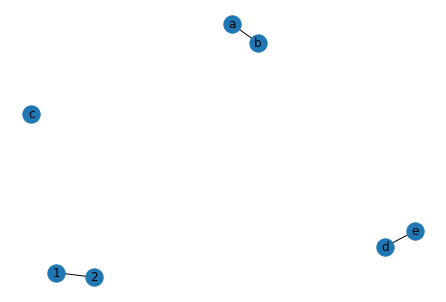

In [5]:
import networkx as nx
G=nx.Graph()

G.add_node("a")                    # graph 에 'a' 추가
G.add_nodes_from(["b","c"])  # node 여러개를 한번에 추가

G.add_edge(1,2)                    # node 1, 2 사이에 edge 추가
edge = ("d", "e")
G.add_edge(*edge)                # node d, e 사이에 edge 추가
edge = ("a", "b")
G.add_edge(*edge)                # node a, b 사에에 edge 추가

print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())

nx.draw(G, with_labels = True)

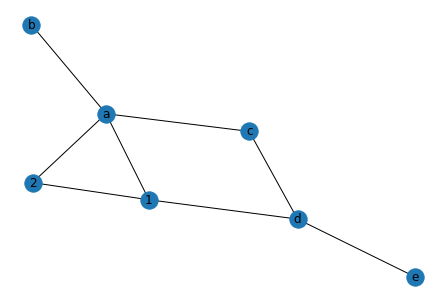

In [6]:
# adding a list of edges:
G.add_edges_from([("a","c"),("c","d"), ("a",1), (1,"d"), ("a",2)])

nx.draw(G, with_labels = True)

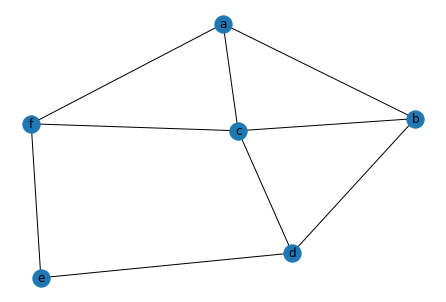

In [7]:
H = nx.Graph()

H.add_edge('a','b')
H.add_edge('a','c')
H.add_edge('a','f')
H.add_edge('b','c')
H.add_edge('b','d')
H.add_edge('c','d')
H.add_edge('c','f')
H.add_edge('d','e')
H.add_edge('e','f')

nx.draw(H, with_labels = True)

## 연습문제

- 위에서 작성한 Graph g 에서 세개의 node 를 연결 (두개의 구간 연결)하는 거리를 계산하는 함수를 작성하세요

In [8]:
g.adjacentList

{'a': [{'node': 'b', 'weight': 7},
  {'node': 'c', 'weight': 9},
  {'node': 'f', 'weight': 14}],
 'b': [{'node': 'a', 'weight': 7},
  {'node': 'c', 'weight': 10},
  {'node': 'd', 'weight': 15}],
 'c': [{'node': 'a', 'weight': 9},
  {'node': 'b', 'weight': 10},
  {'node': 'd', 'weight': 11},
  {'node': 'f', 'weight': 2}],
 'd': [{'node': 'b', 'weight': 15},
  {'node': 'c', 'weight': 11},
  {'node': 'e', 'weight': 6}],
 'e': [{'node': 'd', 'weight': 6}, {'node': 'f', 'weight': 9}],
 'f': [{'node': 'a', 'weight': 14},
  {'node': 'c', 'weight': 2},
  {'node': 'e', 'weight': 9}]}

In [8]:
def connect(a, b, c):
    
    def dist(x, y):
        for n in g.adjacentList[x]:
            
            # CODE HERE
    
    return dist(a, b) + dist(b, c)

In [9]:
connect('a', 'b', 'c')

17